<a href="https://colab.research.google.com/github/Karennina00/Pemograan_Python/blob/main/COST231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

**Gambar 1**

**Urban**

In [18]:
frek=1800
loc='urban'
ht=80
hr=1.5
dmin=200
dmax=700
N=200
d=np.random.randint(dmin,dmax,N)

In [19]:
LpUrban= cos(frek,loc,ht,hr,d)

In [20]:
d_sort_urban = d[np.argsort(d)]
Urban_sort = LpUrban[np.argsort(d)]

**Sub urban**

In [21]:
loc = 'suburban'
LpSubUrban = cos(frek,loc,ht,hr,d)
d_Sort_SubUrban = d[np.argsort(d)]
Sub_Urban_Sort = LpSubUrban[np.argsort(d)]

**Open**

In [22]:
loc = 'open'
LpOpen = cos(frek,loc,ht,hr,d)
d_sort_open = d[np.argsort(d)]
Open_sort = LpOpen[np.argsort(d)]

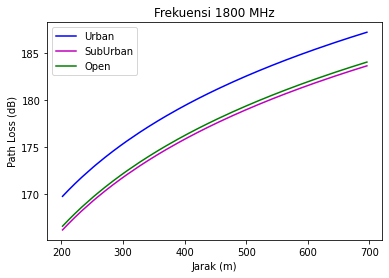

In [23]:
plt.figure()
plt.plot(d_sort_urban,Urban_sort,'b', label='Urban')
plt.plot(d_Sort_SubUrban,Sub_Urban_Sort,'m', label='SubUrban')
plt.plot(d_sort_open,Open_sort,'g', label='Open')
plt.legend()
plt.title("Frekuensi 1800 MHz")
plt.xlabel("Jarak (m)")
plt.ylabel("Path Loss (dB)")
plt.show()

**Gambar 2**

In [24]:
#700
frek= 700
loc='urban'
ht=80 
hr=1.5 
dmin=200 
dmax=700 
N=200
d=np.random.randint(dmin,dmax,N)
Lp7 = cos(frek,loc,ht,hr,d)
sort7 = d[np.argsort(d)]
urban1= Lp7[np.argsort(d)]

#900
frek=900
Lp9= cos(frek,loc,ht,hr,d)
sort9 = d[np.argsort(d)]
urban2 = Lp9[np.argsort(d)]

#1800
frek=1800
Lp18 = cos(frek,loc,ht,hr,d)
sort18= d[np.argsort(d)]
urban3 = Lp18[np.argsort(d)]

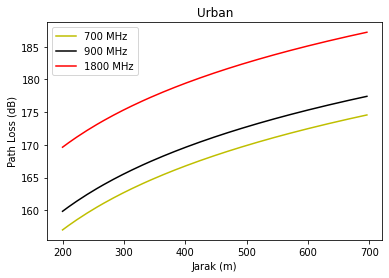

In [25]:
plt.figure()
plt.plot(sort7,urban1,'y', label="700 MHz")
plt.plot(sort9,urban2,'k', label = "900 MHz")
plt.plot(sort18,urban3,'r', label="1800 MHz")
plt.legend()
plt.title("Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("Path Loss (dB)")
plt.show()